In [ ]:
import pandas as pd
import statistics as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Problem statement
The objective of this project is to analyze student performance in Egypt’s education system based on demographic and academic data. The model aims to predict a student's final performance using features such as parental education, education type, and subject scores

## Goal of Data
* Evaluating Academic Performance – Assessing students' scores across different subjects and categorizing their performance (High, Medium, Low)

# Description
* Student name: The name of the students.        
* Student age: The age of the students.
* Student year: The academic year the student is in (e.g., Grade 10, Grade 11).
* Father degree: The father's level of education (e.g., Bachelor's, Master's).
* Mother degree: The mother's level of education.
* Education type:  The type of education the student is enrolled.
* Subject_1 to Subject_10: The scores for 10 different subjects.
* Average score: The mean score across all subjects for each student.
* Performance category: A classification of student performance.
         * High (≥85)

         * Medium (70-84)

         * Low (<70)

## Target variable: Performance Category

# Understanding tha data

In [ ]:
# load the data
df=pd.read_csv('/content/egypt_education_dataset.csv')
df

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10
0,Allison Lang,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678
1,Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158
2,Melissa Lee,16,Year 10,NaN,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634
3,Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706
4,Eric Steele,17,Year 11,PhD,NaN,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Bruce Vargas,15,Year 11,NaN,Master,IB,84.760901,96.154122,71.428657,52.579123,62.243286,63.188827,93.744022,72.375436,77.848848,66.807401
49996,Clarence Foley,16,Year 11,NaN,PhD,IGCSE,82.196281,84.939252,56.661299,88.210451,84.573156,73.009089,68.842074,76.605868,76.255564,80.606913
49997,Dawn Palmer,14,Year 10,PhD,PhD,Thanweya,90.035457,30.790153,64.771808,82.749067,52.774571,65.665893,74.760145,74.148929,64.687866,86.811651
49998,Albert Berry,15,Year 10,PhD,Bachelor,Thanweya,58.177784,81.879862,86.309918,100.000000,77.616452,89.898231,62.805221,57.548277,70.028551,80.779414


In [ ]:
# Define Regression Target (Average Score)
df["Average_Score"] = df[["Subject_1", "Subject_2", "Subject_3", "Subject_4", "Subject_5",
                            "Subject_6", "Subject_7", "Subject_8", "Subject_9", "Subject_10"]].mean(axis=1)

# Define Classification Target (Performance Category)
def classify_performance(score):
    if score >= 85:
        return "High"
    elif score >= 70:
        return "Medium"
    else:
        return "Low"

df["Performance_Category"] = df["Average_Score"].apply(classify_performance)

# Save the updated dataset
df.to_csv("/content/egypt_education_dataset.csv", index=False)

# Display the first few rows
df.head()


,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Average_Score,Performance_Category
0,Allison Lang,18,Year 9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678,71.894448,Medium
1,Jaclyn Mcneil,14,Year 9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,72.512281,Medium
2,Melissa Lee,16,Year 10,NaN,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634,86.491867,High
3,Timothy Maxwell,14,Year 10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706,80.378611,Medium
4,Eric Steele,17,Year 11,PhD,NaN,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467,70.027209,Medium


In [ ]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student Name          50000 non-null  object 
 1   Student Age           50000 non-null  int64  
 2   Student year          50000 non-null  object 
 3   Father Degree         39960 non-null  object 
 4   Mother Degree         39910 non-null  object 
 5   Education Type        50000 non-null  object 
 6   Subject_1             50000 non-null  float64
 7   Subject_2             50000 non-null  float64
 8   Subject_3             50000 non-null  float64
 9   Subject_4             50000 non-null  float64
 10  Subject_5             50000 non-null  float64
 11  Subject_6             50000 non-null  float64
 12  Subject_7             50000 non-null  float64
 13  Subject_8             50000 non-null  float64
 14  Subject_9             50000 non-null  float64
 15  Subject_10         

In this data contain 50000 values

Father Degree,Mother Degree have some null values

In this data 11 float values,1 integer,6 object values

In [ ]:
# checking null values
df.isnull().sum()

,0
Student Name,0
Student Age,0
Student year,0
Father Degree,10040
Mother Degree,10090
Education Type,0
Subject_1,0
Subject_2,0
Subject_3,0
Subject_4,0


father degree have 10040 null values

mother degree have 10090 null values

In [ ]:
# column naames of the data
df.columns

Index(['Student Name', 'Student Age', 'Student year', 'Father Degree',
       'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2',
       'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
       'Subject_8', 'Subject_9', 'Subject_10', 'Average_Score',
       'Performance_Category'],
      dtype='object')

# Data cleaning

In [ ]:
# replace year
df['Student year']=df['Student year'].str.replace('Year ','')

In [ ]:
# check any duplicate value in the data
df.duplicated().sum()

np.int64(0)

In this data there were no duplicate values

In [ ]:
df.head()

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Average_Score,Performance_Category
0,Allison Lang,18,9,High School,High School,IB,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678,71.894448,Medium
1,Jaclyn Mcneil,14,9,Bachelor,PhD,IB,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,72.512281,Medium
2,Melissa Lee,16,10,NaN,PhD,IB,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634,86.491867,High
3,Timothy Maxwell,14,10,Bachelor,Bachelor,Thanweya,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706,80.378611,Medium
4,Eric Steele,17,11,PhD,NaN,IGCSE,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467,70.027209,Medium


In [ ]:
# fill the null values
df['Father Degree'].fillna(st.mode(df['Father Degree']),inplace=True)
df['Mother Degree'] = df['Mother Degree'].fillna(df['Mother Degree'].mode()[0])

<ipython-input-10-7e4650ce8a93>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Father Degree'].fillna(st.mode(df['Father Degree']),inplace=True)


In [ ]:
# check all the null va;lues have been filled
df.isnull().sum()

,0
Student Name,0
Student Age,0
Student year,0
Father Degree,0
Mother Degree,0
Education Type,0
Subject_1,0
Subject_2,0
Subject_3,0
Subject_4,0


In [ ]:
# call the unique
df['Education Type'].unique()
df['Father Degree'].unique()

array(['High School', 'Bachelor', 'PhD', 'Master'], dtype=object)

# Descriptive statistics

In [ ]:
# describe the data
df.describe()

,Student Age,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Average_Score
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,16.00368,74.730855,74.697132,74.658231,74.789693,74.610735,74.741407,74.690653,74.734522,74.710284,74.689639,74.705315
std,1.41582,14.345020,14.367525,14.330384,14.366513,14.326871,14.408353,14.348436,14.373802,14.355054,14.365250,4.556773
min,14.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,56.823797
25%,15.00000,64.918132,64.786097,64.870431,64.884569,64.752157,64.837589,64.944466,64.985014,64.977238,64.845485,71.647110
50%,16.00000,75.050027,74.916854,74.959196,75.045955,74.920325,75.083056,74.966657,74.949263,75.033263,74.987325,74.766357
75%,17.00000,85.145231,85.139383,84.972541,85.268959,84.984459,85.208810,85.071789,85.119971,85.152224,85.087438,77.803345
max,18.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,91.548275


In this  data there were lot of outliers in the data we can see that subject_1 column 75% is 85.145231 and max is 100.000000

In [ ]:
# labelencoder is used to convert the object variable to integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Student Name']=le.fit_transform(df['Student Name'])

In [ ]:
mapping={'High':2,'Medium':1,'Low':0}
df['Performance_Category']=df['Performance_Category'].map(mapping)

In [ ]:
mappi={'IB':2, 'Thanweya':0, 'IGCSE':1}
df['Education Type']=df['Education Type'].map(mappi)

In [ ]:
maping1={'High School':0, 'Bachelor':1, 'PhD':3, 'Master':2}
a=['Father Degree','Mother Degree']
for i in a:
  df[i]=df[i].map(maping1)

In [ ]:
# check all the object variable to integers
df.head()

,Student Name,Student Age,Student year,Father Degree,Mother Degree,Education Type,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8,Subject_9,Subject_10,Average_Score,Performance_Category
0,1036,18,9,0,0,2,72.236740,85.931149,65.698513,84.163844,78.179414,50.578209,70.071681,80.294509,72.709741,59.080678,71.894448,1
1,15207,14,9,1,3,2,91.603078,73.186427,64.240239,47.786542,83.138581,66.913702,42.587211,87.997009,89.176862,78.493158,72.512281,1
2,27035,16,10,1,3,2,100.000000,83.985923,89.378162,82.446853,86.368818,90.347020,100.000000,83.972296,69.212961,79.206634,86.491867,2
3,37755,14,10,1,1,0,91.082131,100.000000,78.802220,78.447670,64.606239,82.045421,69.869099,91.122870,95.207752,52.602706,80.378611,1
4,12958,17,11,3,1,1,74.906144,69.518146,65.284841,56.317028,69.758140,85.810641,63.776955,61.802599,84.951132,68.146467,70.027209,1


# Data visualization

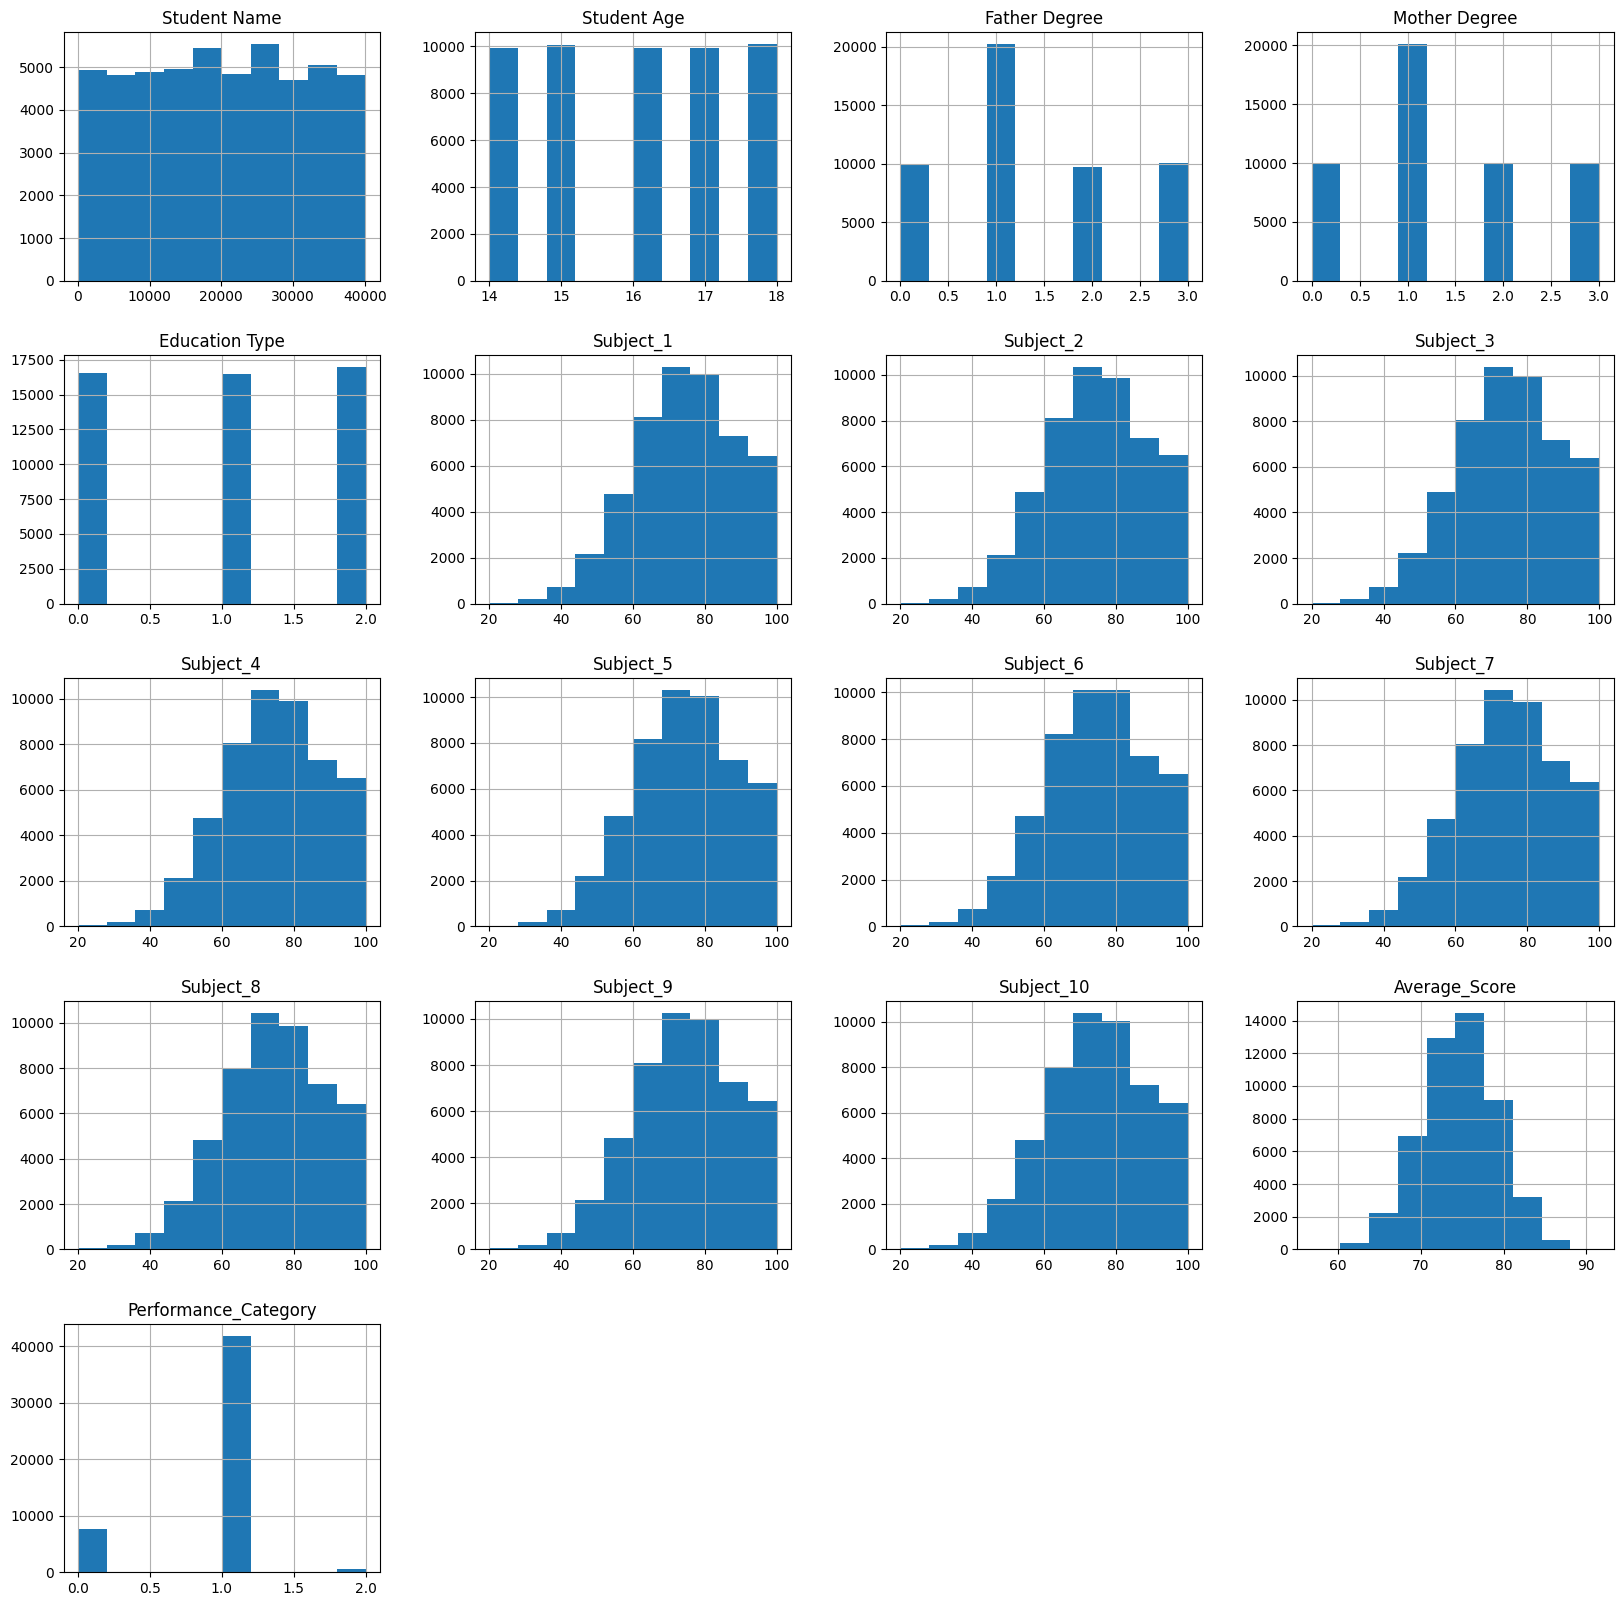

In [ ]:
# histogram
df.hist(figsize=(20,20))
plt.show()

<ipython-input-20-4f7eee92f90c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Performance_Category', data=df, palette='viridis')


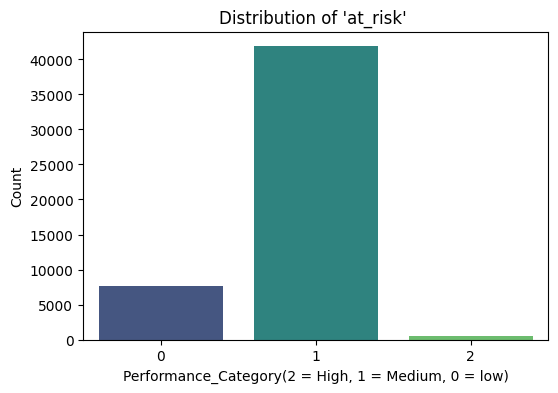

In [ ]:
# Distribution at_risk
plt.figure(figsize=(6, 4))
sns.countplot(x='Performance_Category', data=df, palette='viridis')
plt.title("Distribution of 'at_risk' ")
plt.xlabel("Performance_Category(2 = High, 1 = Medium, 0 = low)")
plt.ylabel("Count")
plt.show()

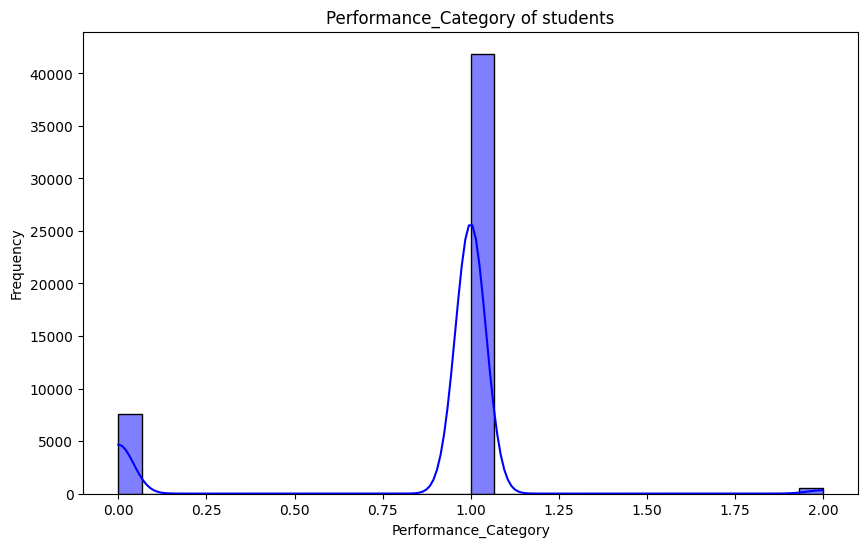

In [ ]:
# Visualize Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Performance_Category'], bins=30, kde=True, color='blue')
plt.title("Performance_Category of students")
plt.xlabel("Performance_Category")
plt.ylabel("Frequency")
plt.show()

# Correlation analysis

<Axes: >

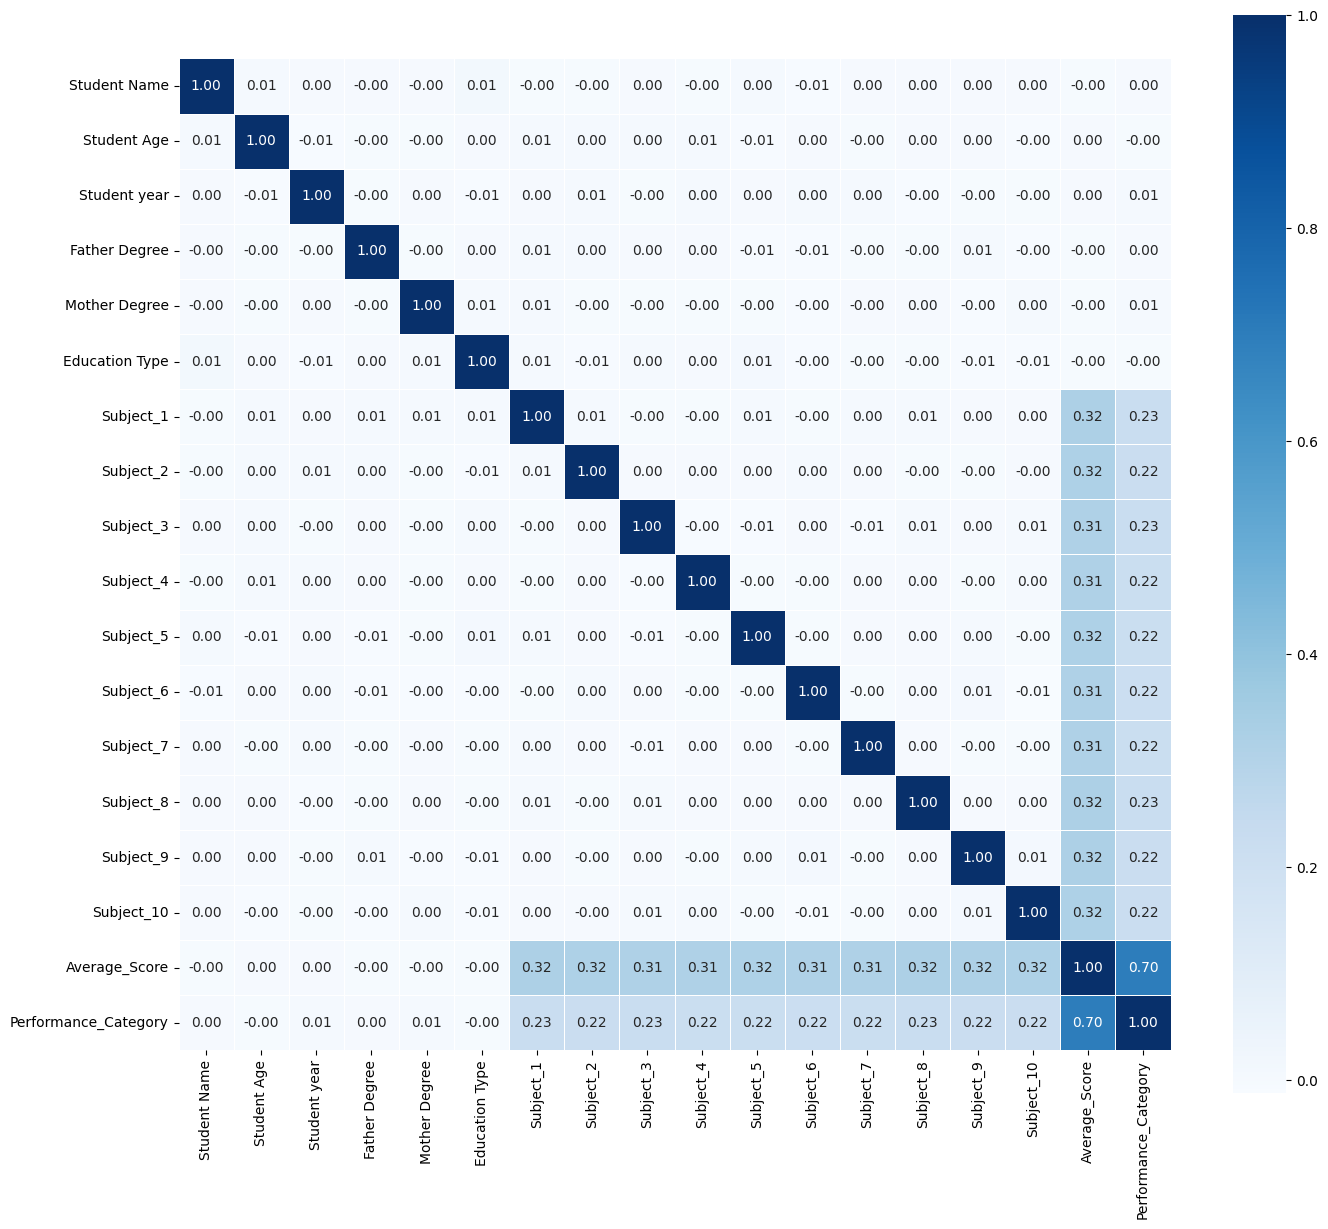

In [ ]:
#heatmap
x=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(x,annot=True,cmap='Blues', linewidth=.5,fmt=".2f", square=True)

# Outlier detection

,0
Student Name,"Axes(0.125,0.786098;0.168478x0.0939024)"
Student Age,"Axes(0.327174,0.786098;0.168478x0.0939024)"
Father Degree,"Axes(0.529348,0.786098;0.168478x0.0939024)"
Mother Degree,"Axes(0.731522,0.786098;0.168478x0.0939024)"
Education Type,"Axes(0.125,0.673415;0.168478x0.0939024)"
Subject_1,"Axes(0.327174,0.673415;0.168478x0.0939024)"
Subject_2,"Axes(0.529348,0.673415;0.168478x0.0939024)"
Subject_3,"Axes(0.731522,0.673415;0.168478x0.0939024)"
Subject_4,"Axes(0.125,0.560732;0.168478x0.0939024)"
Subject_5,"Axes(0.327174,0.560732;0.168478x0.0939024)"


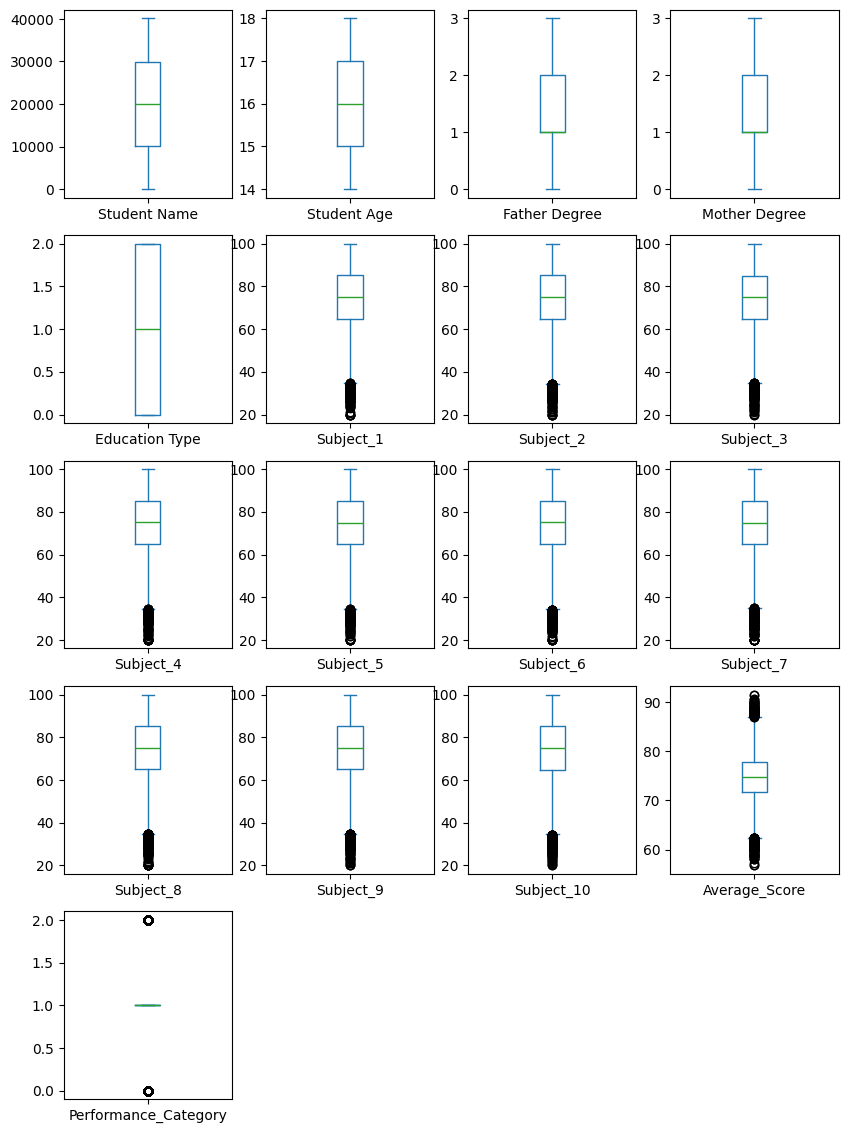

In [ ]:
#outliers
df.plot(kind='box',subplots=True,layout=(7,4),figsize=(10,20))

Plot te box plot to detect the outliers of the data we can visualize that students and the remaining columns have lot of outliers


In [ ]:
# To reduce the skewness of the above dataset
#df.info()
#x=['Student Name', 'Student Age',  'Father Degree',
#      'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2',
#       'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
#       'Subject_8', 'Subject_9', 'Subject_10', 'Average_Score']
#for i in x:
    # Check if the column contains numeric data before applying log1p
#    if pd.api.types.is_numeric_dtype(df[i]):
#        df[i] = np.log1p(df[i])

np.log is a natural algorithm which is useful for transforming data may contain small or zero values . As it avoid with taking the logarithm of zero

In [ ]:
#removing outlayres using iqr method
#import numpy as np
#x=['Subject_1', 'Subject_2','Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7','Subject_8', 'Subject_9', 'Subject_10', 'Average_Score']
#for i in x:
 #   data=df[i]
 #   q1=np.quantile(data,0.25)
 #   q2=np.quantile(data,0.50)
 #   q3=np.quantile(data,0.75)
 #   iqr=q3-q1
 #   lower=q1-(1.5*iqr)
 #   upper=q3+(1.5*iqr)
 #   outliers=[j for j in data if j<lower or j>upper]
 #   print(len(outliers))
 #   df= df[(df[i] >= lower) &(df[i] <= upper)]

# Feature engineering

preprocessing steps in machine learning that involves transforming raw data into more effective set of inputs for machine learning models

<Axes: >

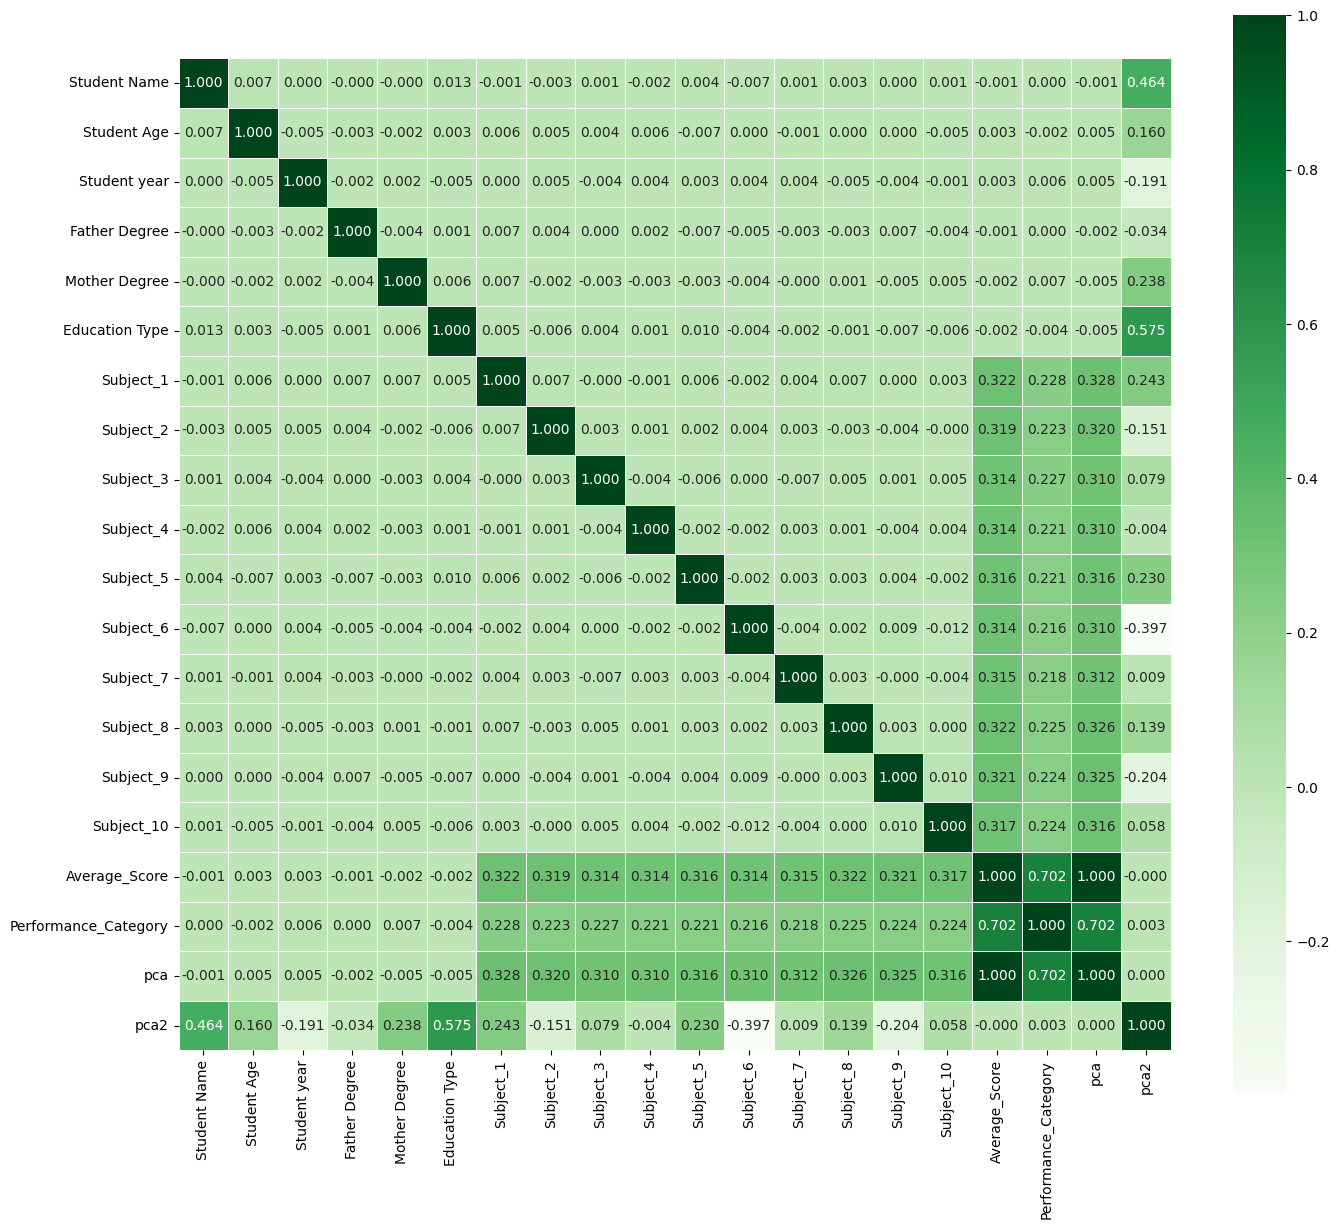

In [ ]:
#heatmap
x=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(x,annot=True,cmap='Greens',fmt=".3f",linewidths=.5,square=True)

# Dimentionality reduction

In [ ]:
# to remove the contents of the data using pca method
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=['Student Name', 'Student Age', 'Student year', 'Father Degree',
       'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2',
       'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
       'Subject_8', 'Subject_9', 'Subject_10', 'Average_Score']
a=sc.fit_transform(df[x])
pca=PCA(n_components=2)
pca_r=pca.fit_transform(a)
df['pca']=pca_r[:,0]
df['pca2']=pca_r[:,1]

In [ ]:
df.columns

Index(['Student Name', 'Student Age', 'Student year', 'Father Degree',
       'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2',
       'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
       'Subject_8', 'Subject_9', 'Subject_10', 'Average_Score',
       'Performance_Category', 'pca', 'pca2'],
      dtype='object')

# Scaling

In [ ]:
# Numerical features in a dataset to a common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df[['Student Name', 'Student Age', 'Student year', 'Father Degree',
       'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2',
       'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
       'Subject_8', 'Subject_9', 'Subject_10', 'Average_Score','pca','pca2']]=sc.fit_transform(df[['Student Name', 'Student Age', 'Student year', 'Father Degree',
       'Mother Degree', 'Education Type', 'Subject_1', 'Subject_2',
       'Subject_3', 'Subject_4', 'Subject_5', 'Subject_6', 'Subject_7',
       'Subject_8', 'Subject_9', 'Subject_10', 'Average_Score','pca','pca2']])

process of transforming data values to a specific range

In [ ]:
# model evaluation
from sklearn.model_selection import train_test_split
y=df["Performance_Category"]
x=df.drop(columns=['Performance_Category'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)
print(f'x_train:{x_train.shape}\ny_train:{y_train.shape}\nx_test:{x_test.shape}\ny_test:{y_test.shape}')

x_train:(40000, 19)
y_train:(40000,)
x_test:(10000, 19)
y_test:(10000,)


In [ ]:
print(x_train)
y_train
# print(x_test)
y_test

       Student Name  Student Age  Student year  Father Degree  Mother Degree  \
39087      1.624535    -1.415222      0.453144      -0.391328       1.576118   
30893     -1.449311     0.703712      1.347801       0.588462      -0.388945   
45278      0.264120    -0.002599     -1.336170      -0.391328      -1.371476   
16398     -1.377678    -1.415222     -1.336170       0.588462      -1.371476   
13653      0.770436    -0.708911      1.347801       0.588462      -1.371476   
...             ...          ...           ...            ...            ...   
11284     -0.470270     0.703712     -0.441513      -1.371118      -0.388945   
44732     -0.085058    -0.002599      0.453144      -0.391328      -1.371476   
38158      0.423266    -0.708911     -0.441513      -0.391328      -1.371476   
860       -1.749105    -1.415222     -1.336170      -0.391328      -0.388945   
15795     -0.175100     1.410024     -0.441513       1.568252      -0.388945   

       Education Type  Subject_1  Subje

,Performance_Category
33553,1
9427,1
199,1
12447,1
39489,1
...,...
28567,0
25079,1
18707,1
15200,1


# Initial modelling

In [ ]:
from sklearn.svm import SVR
svm_model = SVR()
# fit the model to the train data
svm_model.fit(x_train,y_train)
# predict the target value of the test data
svm_prediction = svm_model.predict(x_test)
print("SVM_Prediction",svm_prediction)# y_test predict the value

# calculating error
from sklearn.metrics import mean_absolute_error
svm_mae=mean_absolute_error(y_test,svm_prediction)
print("Mean absolute error of SVM = ",svm_mae)

from sklearn.metrics import mean_squared_error
import math # Import the math module

# rmse of the data
svm_mse=mean_squared_error(y_test,svm_prediction)
svm_rmse=math.sqrt(svm_mse)  # Use math.sqrt to calculate the square root
print("Root Mean Squared Error of SVM",svm_rmse)


# to find the accuracy of the above dataset
from sklearn.metrics import r2_score
r=r2_score(y_test,svm_prediction)
r

SVM_Prediction [1.04828962 0.95666118 0.89180824 ... 0.59384322 0.92614421 1.10673881]
Mean absolute error of SVM =  0.12242970751555549
Root Mean Squared Error of SVM 0.1795728942353775


0.7787050708162586

# Documentation and reporting

In [ ]:
# calculate the error
from sklearn.metrics import mean_absolute_error
# Assuming svm_model is defined and fitted in previous code
# Fit the model again, if needed, or ensure it's still in memory

# Assuming 'svm_model' is your trained SVR model
svm_prediction = svm_model.predict(x_test)  # Predict on the current 'x_test'
svm_mae = mean_absolute_error(y_test, svm_prediction)
print("Mean absolute error of SVM = ",svm_mae)

# to find the accuracy of the above dataset
from sklearn.metrics import r2_score
r=r2_score(y_test,svm_prediction)
r

Mean absolute error of SVM =  0.12242970751555549


0.7787050708162586

In [ ]:
# to find the accuracy of the above dataset
from sklearn.metrics import r2_score
r=r2_score(y_test,svm_prediction)
r

0.7787050708162586